## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
a = -1
b = 2
x = np.linspace(0,20)
y = a * x + b

In [3]:
print("x=",x)
print("y=",y)

x= [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
y= [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -

#### Plot your data points. 

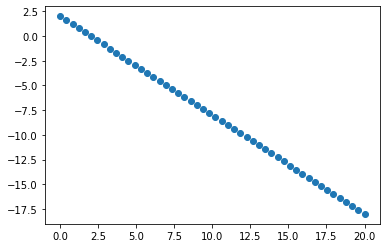

In [4]:
plt.scatter(x,y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [5]:
theta_0 = 0
theta_1 = 0
alpha = 0.005   #learning rate
max_iteration = 5000

In [6]:
def SVLR (x, y, alpha, max_iteration):
    theta_0 = 0
    theta_1 = 0

    cost_function = []
    theta0_values = []
    theta1_values = []
    new_hypothesis = []
    hypothesis = np.zeros(len(x))
    
    for i in range (max_iteration):
        
        hypothesis = theta_0 + theta_1 * x
        new_hypothesis.append(hypothesis)
        
        cost = (1/2*len(x))* np.sum(((hypothesis - y) ** 2))
        cost_function.append(cost)
        #print(cost)
        
        gradiant_theta0 = (1/len(x)) * np.sum(hypothesis - y)
        gradiant_theta1 = (1/len(x)) * np.sum((hypothesis - y) * x)
        
        theta_0 = theta_0 - alpha * gradiant_theta0
        theta0_values.append(theta_0)
        
        theta_1 = theta_1 - alpha * gradiant_theta1
        theta1_values.append(theta_1)
                             
        #gradiant_norm = np.sqrt((gradiant_theta0 ** 2)+(gradiant_theta1 ** 2))
        #if(gradiant_norm == 0):
        #    break
        if(cost < 0.05):
            final_epoch = i
            print("final epoch= ",final_epoch)
            break
        
    
    return theta0_values, theta1_values, cost_function, new_hypothesis

In [7]:
theta0, theta1, losses, hypo = SVLR (x, y, alpha, max_iteration)

final epoch=  3987


In [8]:
r2_score(y,hypo[-1]) 

0.9999988484380363

In [9]:
print(losses[-1])

0.0499401872005526


In [10]:
print(theta0[-1])

1.9875617664320973


In [11]:
print(theta1[-1])

-0.99907479583123


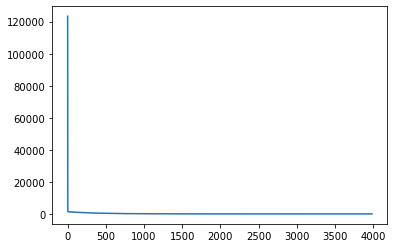

In [12]:
plt.plot(losses)

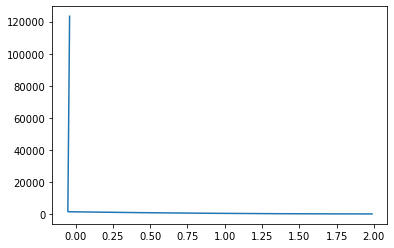

In [13]:
plt.plot(theta0, losses)

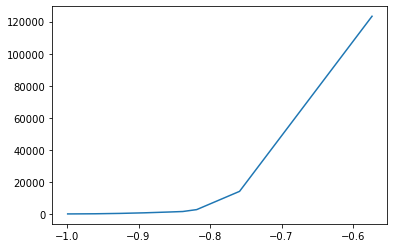

In [14]:
plt.plot(theta1, losses)

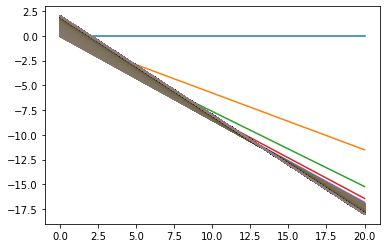

In [15]:
for  i in range(len(hypo)):
    plt.plot(x,hypo[i])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

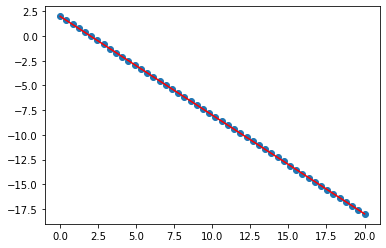

In [16]:
plt.plot(x,hypo[-1],'r')
plt.scatter(x,y)
plt.show

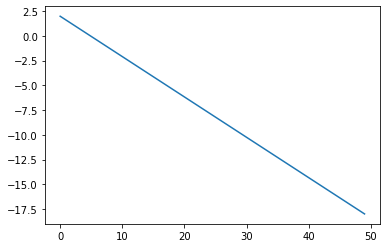

In [17]:
best_hypo = hypo[-1]
plt.plot(best_hypo)

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

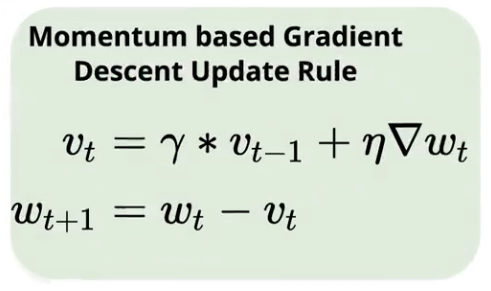

#### γ takes values between 0 and 1.
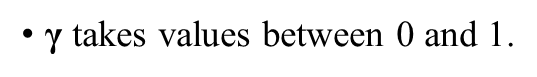

In [18]:
def momentumGD (x, y, alpha, gamma, v0, v1, epoch):
    theta_0 = 0
    theta_1 = 0

    cost_function = []
    theta0_values = []
    theta1_values = []
    new_hypothesis = []
    v0_list = []
    v1_list = []
    hypothesis = np.zeros(len(x))
    
    for i in range (epoch):
        
        hypothesis = theta_0 + theta_1 * x
        new_hypothesis.append(hypothesis)
        
        cost = (1/2*len(x))* np.sum(((hypothesis - y) ** 2))
        cost_function.append(cost)
        #print(cost)
        
        gradiant_theta0 = (1/len(x)) * np.sum(hypothesis - y)
        gradiant_theta1 = (1/len(x)) * np.sum((hypothesis - y) * x)
        
        v0 = v0 * gamma + alpha * gradiant_theta0
        v0_list.append(v0)
        v1 = v1 * gamma + alpha * gradiant_theta1
        v1_list.append(v1)
        
        theta_0 = theta_0 - v0
        theta0_values.append(theta_0)
        
        theta_1 = theta_1 - v1
        theta1_values.append(theta_1)
                             
        if(cost < 0.05):
            final_epoch = i
            print("final epoch= ",final_epoch)
            break
        
    print("last theta0: ", theta0_values[-1], "\nlast theta1: ", theta1_values[-1], "\nlast losses: ", cost_function[-1], "\nlast hypothesis: ", new_hypothesis[-1])
    
    return theta0_values, theta1_values, cost_function, new_hypothesis

In [19]:
alpha = 0.005
gamma = 0.95
v0 = 0
v1 = 1
epoch = 1000

theta0_m, theta1_m, losses_m, hypo_m = momentumGD (x, y, alpha, gamma, v0, v1, epoch)

final epoch=  187
last theta0:  1.9926876224103607 
last theta1:  -0.9881536326470126 
last losses:  0.02039759123345553 
last hypothesis:  [  1.99205753   1.58412568   1.17619382   0.76826197   0.36033012
  -0.04760174  -0.45553359  -0.86346545  -1.2713973   -1.67932915
  -2.08726101  -2.49519286  -2.90312471  -3.31105657  -3.71898842
  -4.12692028  -4.53485213  -4.94278398  -5.35071584  -5.75864769
  -6.16657954  -6.5745114   -6.98244325  -7.39037511  -7.79830696
  -8.20623881  -8.61417067  -9.02210252  -9.43003437  -9.83796623
 -10.24589808 -10.65382994 -11.06176179 -11.46969364 -11.8776255
 -12.28555735 -12.6934892  -13.10142106 -13.50935291 -13.91728477
 -14.32521662 -14.73314847 -15.14108033 -15.54901218 -15.95694403
 -16.36487589 -16.77280774 -17.1807396  -17.58867145 -17.9966033 ]


In [20]:
r2_score(y,hypo_m[-1])

0.9999995296555433

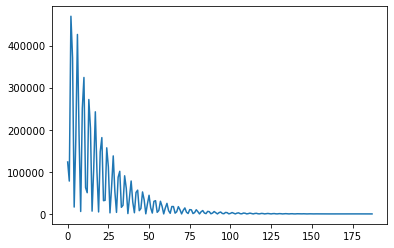

In [21]:
plt.plot(losses_m)

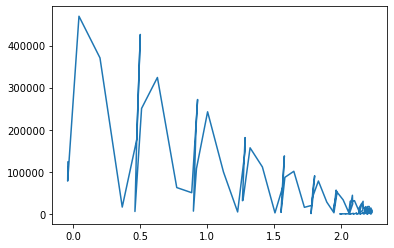

In [22]:
plt.plot(theta0_m, losses_m)

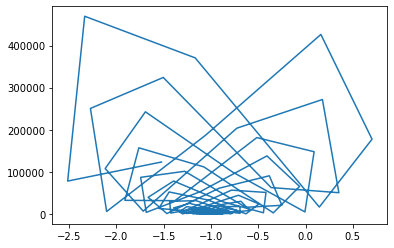

In [23]:
plt.plot(theta1_m, losses_m)

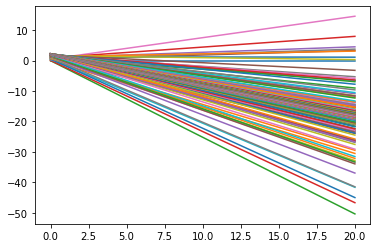

In [24]:
for  i in range(len(hypo_m)):
    plt.plot(x,hypo_m[i])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

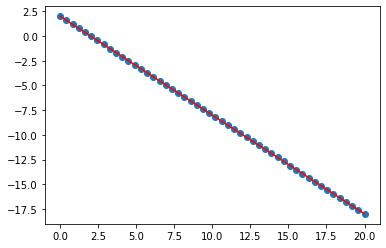

In [25]:
plt.plot(x,hypo_m[-1],'r')
plt.scatter(x,y)
plt.show

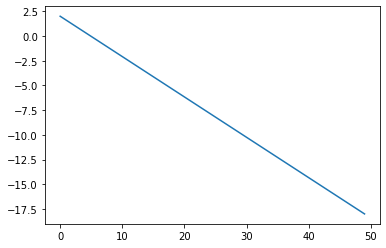

In [26]:
best_hypo = hypo_m[-1]
plt.plot(best_hypo)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [47]:
alpha = 0.005
gamma = 0.3
v0 = 0
v1 = 1
epoch = 1000

theta0_m1, theta1_m1, losses_m1, hypo_m1 = momentumGD (x, y, alpha, gamma, v0, v1, epoch)

last theta0:  1.6748386165264781 
last theta1:  -0.9758132321707598 
last losses:  34.16720505944586 
last hypothesis:  [  1.6742421    1.2759691    0.87769609   0.47942309   0.08115008
  -0.31712292  -0.71539593  -1.11366893  -1.51194193  -1.91021494
  -2.30848794  -2.70676095  -3.10503395  -3.50330696  -3.90157996
  -4.29985297  -4.69812597  -5.09639898  -5.49467198  -5.89294498
  -6.29121799  -6.68949099  -7.087764    -7.486037    -7.88431001
  -8.28258301  -8.68085602  -9.07912902  -9.47740203  -9.87567503
 -10.27394803 -10.67222104 -11.07049404 -11.46876705 -11.86704005
 -12.26531306 -12.66358606 -13.06185907 -13.46013207 -13.85840507
 -14.25667808 -14.65495108 -15.05322409 -15.45149709 -15.8497701
 -16.2480431  -16.64631611 -17.04458911 -17.44286212 -17.84113512]


In [49]:
r2_score(y, hypo_m1[-1])

0.999212144448041

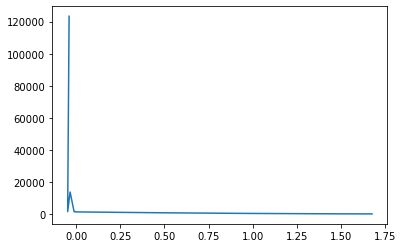

In [50]:
plt.plot(theta0_m1, losses_m1)

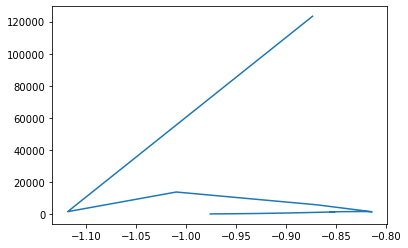

In [51]:
plt.plot(theta1_m1, losses_m1)

In [53]:
alpha = 0.005
gamma = 0
v0 = 0
v1 = 1
epoch = 1000

theta0_m2, theta1_m2, losses_m2, hypo_m2 = momentumGD (x, y, alpha, gamma, v0, v1, epoch)

last theta0:  1.427349715442548 
last theta1:  -0.9574040455481475 
last losses:  105.85508178426349 
last hypothesis:  [  1.42661532   1.03586046   0.64510559   0.25435073  -0.13640414
  -0.527159    -0.91791387  -1.30866873  -1.6994236   -2.09017846
  -2.48093333  -2.87168819  -3.26244305  -3.65319792  -4.04395278
  -4.43470765  -4.82546251  -5.21621738  -5.60697224  -5.99772711
  -6.38848197  -6.77923684  -7.1699917   -7.56074657  -7.95150143
  -8.3422563   -8.73301116  -9.12376602  -9.51452089  -9.90527575
 -10.29603062 -10.68678548 -11.07754035 -11.46829521 -11.85905008
 -12.24980494 -12.64055981 -13.03131467 -13.42206954 -13.8128244
 -14.20357927 -14.59433413 -14.985089   -15.37584386 -15.76659872
 -16.15735359 -16.54810845 -16.93886332 -17.32961818 -17.72037305]


In [54]:
r2_score(y, hypo_m2[-1])

0.9975591063494452

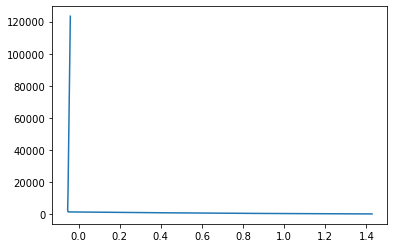

In [55]:
plt.plot(theta0_m2, losses_m2)

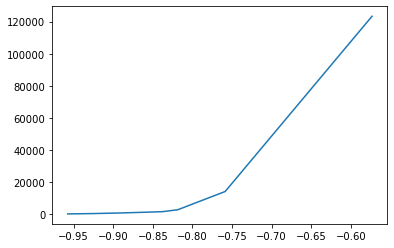

In [56]:
plt.plot(theta1_m2, losses_m2)

### Update your Batch GD for one variable  implementation to be NAG and check your results

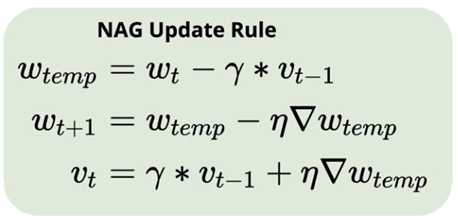

In [69]:
def NAG_algo (x, y, alpha, gamma, v0, v1, epoch):
    theta_0 = 0
    theta_1 = 0

    cost_function = []
    theta0_values = []
    theta1_values = []
    new_hypothesis = []
    v0_list = []
    v1_list = []
    theta0_temp = 0
    theta1_temp = 0
    hypothesis = np.zeros(len(x))
    
    for i in range (epoch):
        
        hypothesis = theta_0 + theta_1 * x
        new_hypothesis.append(hypothesis)
        
        cost = (1/2*len(x))* np.sum(((hypothesis - y) ** 2))
        cost_function.append(cost)
        
        theta0_temp = theta_0 - gamma * v0
        theta1_temp = theta_1 - gamma * v1
            
        hypothesis = theta0_temp + theta1_temp * x
        
        gradiant_theta0 = (1/len(x)) * np.sum(hypothesis - y)
        gradiant_theta1 = (1/len(x)) * np.sum((hypothesis - y) * x)
        
        theta_0 = theta0_temp - alpha * gradiant_theta0
        theta0_values.append(theta_0)
        v0 = gamma * v0 + alpha * gradiant_theta0
        v0_list.append(v0)
        
        theta_1 = theta1_temp - alpha * gradiant_theta1
        theta1_values.append(theta_1)
        v1 = gamma * v1 + alpha * gradiant_theta1
        v1_list.append(v1)
                             
        if(cost < 0.05):
            final_epoch = i
            print("final epoch= ",final_epoch)
            break
        
    print("last theta0: ", theta0_values[-1], "\nlast theta1: ", theta1_values[-1], "\nlast losses: ", cost_function[-1], "\nlast hypothesis: ", new_hypothesis[-1], "\nlast v0: ", v0_list[-1], "\nlast v1: ", v1_list[-1])
    
    return theta0_values, theta1_values, cost_function, new_hypothesis, v0_list, v1_list

In [70]:
alpha = 0.005
gamma = 0.95
v0 = 0
v1 = 1
epoch = 1000

theta0_nag, theta1_nag, losses_nag, hypo_nag , v0_nag, v1_nag = NAG_algo (x, y, alpha, gamma, v0, v1, epoch)

final epoch=  48
last theta0:  2.0057034448538884 
last theta1:  -1.0004242444016358 
last losses:  0.03036775951956579 
last hypothesis:  [  1.99028827   1.58241986   1.17455145   0.76668304   0.35881463
  -0.04905378  -0.45692219  -0.8647906   -1.27265901  -1.68052742
  -2.08839583  -2.49626424  -2.90413265  -3.31200106  -3.71986947
  -4.12773788  -4.53560629  -4.94347469  -5.3513431   -5.75921151
  -6.16707992  -6.57494833  -6.98281674  -7.39068515  -7.79855356
  -8.20642197  -8.61429038  -9.02215879  -9.4300272   -9.83789561
 -10.24576402 -10.65363243 -11.06150084 -11.46936925 -11.87723766
 -12.28510607 -12.69297448 -13.10084289 -13.5087113  -13.91657971
 -14.32444812 -14.73231653 -15.14018494 -15.54805335 -15.95592176
 -16.36379017 -16.77165858 -17.17952699 -17.5873954  -17.99526381] 
last v0:  -0.015415174945592414 
last v1:  0.0011466406415339765


In [71]:
r2_score(y,hypo_nag[-1])

0.9999992997551923

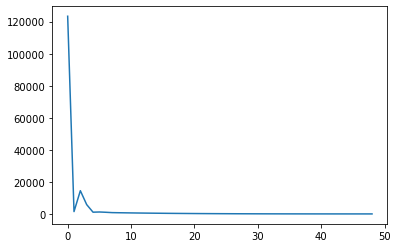

In [72]:
plt.plot(losses_nag)

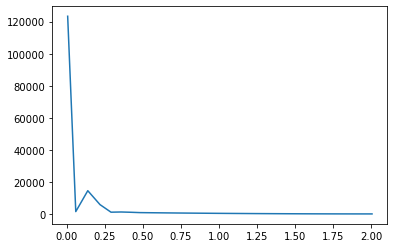

In [73]:
plt.plot(theta0_nag, losses_nag)

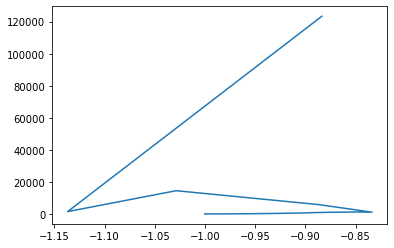

In [74]:
plt.plot(theta1_nag, losses_nag)

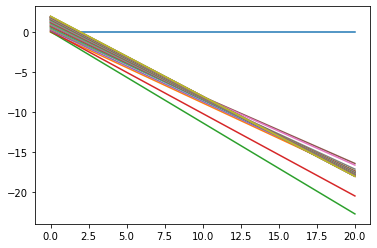

In [75]:
for  i in range(len(hypo_nag)):
    plt.plot(x,hypo_nag[i])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

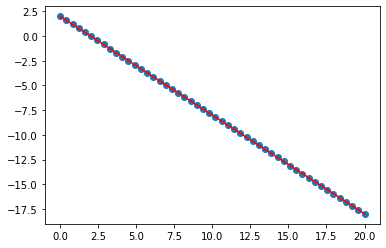

In [76]:
plt.plot(x,hypo_nag[-1],'r')
plt.scatter(x,y)
plt.show

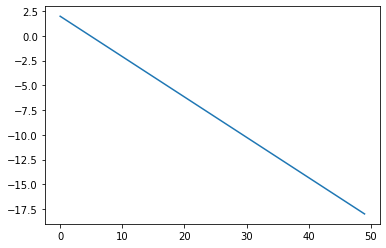

In [77]:
best_hypo = hypo_nag[-1]
plt.plot(best_hypo)

## Congratulations 
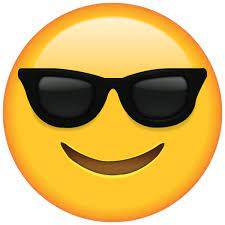